In [31]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np

# Couldn't download dataset without turning off SSL verification
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

BATCH_SIZE = 200
learning_rate =  0.0001
epochs = 1

# Importing a training set and a test set
# Download = True downlaods the dataset if it isnt available already in root.
# Train specifies training or test dataset
# We want the images as tensors so that's where ToTensor comes in
training_data = datasets.CIFAR10(
    root="E1DATA",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

trainloader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE,
                                          shuffle=True)

test_data = datasets.CIFAR10(
    root="E1DATA",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [32]:
# Size of our images, needed when defining our network below.
print(vars(trainloader))
print((trainloader.dataset))

{'dataset': Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E1DATA
    Split: Train
    StandardTransform
Transform: ToTensor(), 'num_workers': 0, 'prefetch_factor': 2, 'pin_memory': False, 'pin_memory_device': '', 'timeout': 0, 'worker_init_fn': None, '_DataLoader__multiprocessing_context': None, '_dataset_kind': 0, 'batch_size': 200, 'drop_last': False, 'sampler': <torch.utils.data.sampler.RandomSampler object at 0x000002FCA1475130>, 'batch_sampler': <torch.utils.data.sampler.BatchSampler object at 0x000002FCA2C074F0>, 'generator': None, 'collate_fn': <function default_collate at 0x000002FC8652FD30>, 'persistent_workers': False, '_DataLoader__initialized': True, '_IterableDataset_len_called': None, '_iterator': None}
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E1DATA
    Split: Train
    StandardTransform
Transform: ToTensor()


# Task 1.1.1

In [33]:
import torch.nn as nn
import torch.nn.functional as F

# Defining what the network looks like.
    
def train_model(model, criterion, optimizer, train_loader, num_epochs):
    loss_train = []
    for epoch in range(num_epochs):
        for batch_nr, (data,labels) in enumerate(train_loader):
            data = data.to(device=device)
            labels = labels.to(device=device)
            prediction = model(data)
            loss = criterion(prediction,labels)
            loss_train.append(float(torch.Tensor.cpu(loss)))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
     
    plt.rcParams['figure.figsize'] = [5, 5]
    
    plt.plot(range(0,len(loss_train)),loss_train)
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.title('Training Set')
    plt.show()
    
    return model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

C:\Users\Olle\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Olle\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

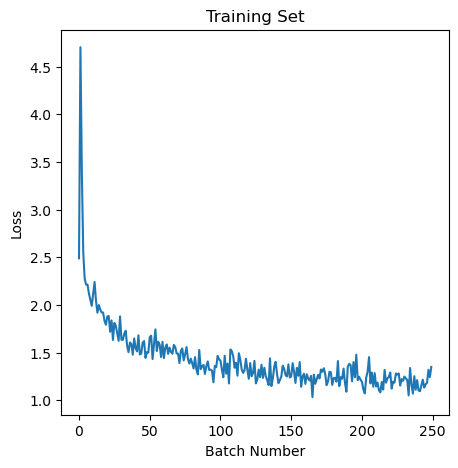

In [34]:
import torchvision.models as models
# FINETUNING

#device = 'cpu'
LEARNING_RATE_FT=0.001

model_ft = models.alexnet(pretrained=True)
criterion_ft = nn.CrossEntropyLoss()
# Weight decay here is the L2 regularization, penalizes large weights (-weight_decay*weight is the update rule)
optimizer_ft =  torch.optim.Adam(model_ft.parameters(), lr=LEARNING_RATE_FT, weight_decay=1e-3)

# Do the things required for fine-tuning before training the model

# Print the model to check what the last layer has as input and output then keep the input the same but change the output.
#print(model_ft) 
model_ft.classifier[6] = nn.Linear(4096,10)
# model_ft.avgpool = nn.Identity()
model_ft.features[12] = nn.Identity()
#print(model_ft) 
model_ft.to(device)
# Train the model
trained_model_ft = train_model(model_ft, criterion_ft, optimizer_ft, trainloader, epochs)

In [35]:
correct = 0
total = 0
y_pred = []
y_true = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch_nr, data in enumerate(testloader):
        images, labels = data
        images = images.to(device=device)
        labels = labels.to(device=device)
        outputs = trained_model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred = np.concatenate((y_pred,torch.Tensor.cpu(predicted)))
        y_true = np.concatenate((y_true,torch.Tensor.cpu(labels)))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 58 %


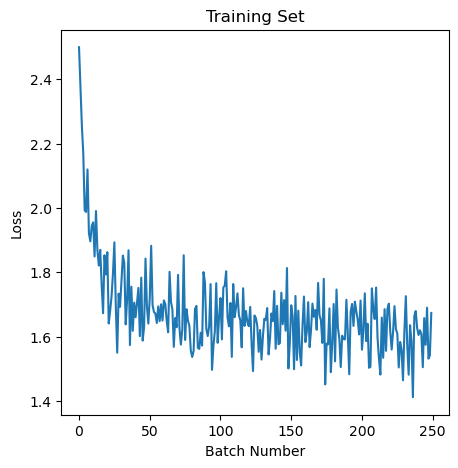

In [19]:
# FEATURE EXTRACTION

LEARNING_RATE_FE=0.001
epochs_fe = 1

model_fe = models.alexnet(pretrained=True)
criterion_fe = nn.CrossEntropyLoss()
# Weight decay here is the L2 regularization, penalizes large weights (-weight_decay*weight is the update rule)


# Turning off weight updates for all parameters
for param in model_fe.parameters():
    param.requires_grad = False
    
model_fe.classifier[6] = nn.Linear(4096,10) # This also turns on requires grad for this layer
model_fe.features[12] = nn.Identity()

# Retrieving the names of the layers to update
params_to_update = []
for name,param in model_fe.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer_fe =  torch.optim.Adam(params_to_update, lr=LEARNING_RATE_FT, weight_decay=1e-3) 
 
model_fe.to(device)
# Train the model
trained_model_fe = train_model(model_fe, criterion_fe, optimizer_fe, trainloader, epochs_fe)

In [20]:
correct = 0
total = 0
y_pred = []
y_true = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch_nr, data in enumerate(testloader):
        images, labels = data
        images = images.to(device=device)
        labels = labels.to(device=device)
        outputs = trained_model_fe(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred = np.concatenate((y_pred,torch.Tensor.cpu(predicted)))
        y_true = np.concatenate((y_true,torch.Tensor.cpu(labels)))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 42 %


# Task 1.1.2

In [23]:

BATCH_SIZE = 10

training_data = datasets.MNIST(
    root="MNIST",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

trainloader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE,
                                          shuffle=True)


test_data = datasets.MNIST(
    root="MNIST",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,
                                         shuffle=False)

In [26]:
class Net(nn.Module):
    def __init__(self, in_channels = 1, num_classes = 10):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1) # 3 input layers (RGB), output layers, kernel size, for 28x28 this conv is type 'same'
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # kernel size, stride
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1) # 3 input layers (RGB), output layers, kernel size
        self.fc1 = nn.Linear(20*7*7, num_classes)

    def forward(self, x):
        # Implement the forward function in the network
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(np.shape(x))
        x = x.view(x.shape[0],-1)
        x = self.fc1(x)
       
        return x

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=980, out_features=10, bias=True)
)


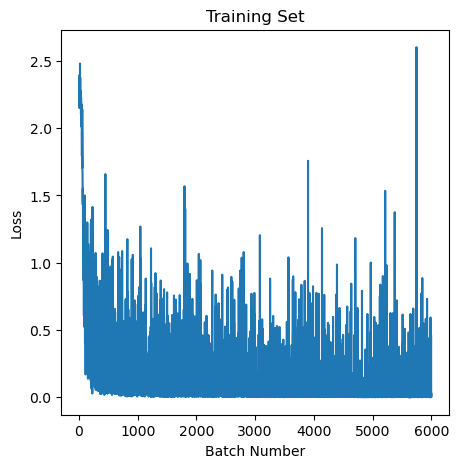

In [27]:
import torchvision.models as models
torch.cuda.empty_cache()
l_r = 0.001
epochs = 1
model = Net()
criterion = nn.CrossEntropyLoss()

print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=l_r)
model.to(device)
trained_model = train_model(model,criterion, optimizer,  trainloader, epochs)



In [28]:
correct = 0
total = 0
y_pred = []
y_true = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch_nr, data in enumerate(testloader):
        images, labels = data
        images = images.to(device=device)
        labels = labels.to(device=device)
        outputs = trained_model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred = np.concatenate((y_pred,torch.Tensor.cpu(predicted)))
        y_true = np.concatenate((y_true,torch.Tensor.cpu(labels)))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 98 %


In [29]:
import torchvision.transforms
BATCH_SIZE = 10

training_data = datasets.SVHN(
    root="SVHN",
    split='train',
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                              torchvision.transforms.Grayscale(1)
                                             ])
                            
    
)

trainloader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE,
                                          shuffle=True)


test_data = datasets.SVHN(
    root="SVHN",
    split='test',
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                              torchvision.transforms.Grayscale(1)
                                             ])
    
)

testloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,
                                         shuffle=False)

Using downloaded and verified file: SVHN\train_32x32.mat
Using downloaded and verified file: SVHN\test_32x32.mat


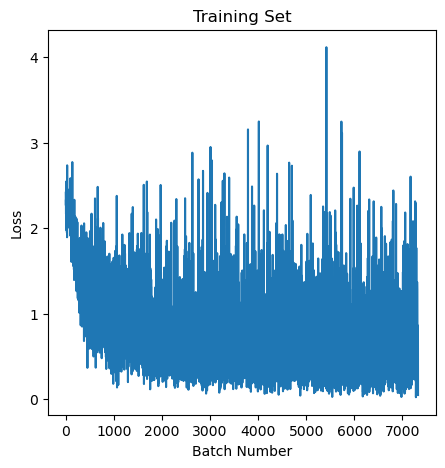

Accuracy of the network on the test images: 82 %


In [30]:

model_svhn = model
model_svhn.fc1 = nn.Linear(20*8*8,10)

#model_svhn.conv1 = nn.Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_svhn.parameters(), lr=l_r)
model_svhn.to(device)
trained_model_svhn = train_model(model_svhn,criterion,optimizer,trainloader,epochs)
correct = 0
total = 0
y_pred = []
y_true = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch_nr, data in enumerate(testloader):
        images, labels = data
        images = images.to(device=device)
        labels = labels.to(device=device)
        outputs = trained_model_svhn(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred = np.concatenate((y_pred,torch.Tensor.cpu(predicted)))
        y_true = np.concatenate((y_true,torch.Tensor.cpu(labels)))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the test images: {100 * correct // total} %')